# Linear regression

## 1. Uni-variate linear regression

### 1.1. Least square estimate
One of the basic models to try, while learning dependence between two real-valued variables $X$ and $Y$ is a uni-variate linear regression:
$$
y=w x.
$$

Admitting that the model's accuracy is not be absolute: 
$$
y=w x + \varepsilon,\hspace{5ex} (1.1)
$$
where $\varepsilon$ is the model's error (often called noise or residual).

The objective is to learn $w$ given a training set of $\{(x_i, y_i), i=1..N\}$ providing the best possible fit for the model. The fit could be characterized by the errors of the model
$$
\varepsilon_i=y_i-w x_i
$$
and in particular by their sum of squares:
$$
RSS(w)=\sum\limits_i \varepsilon_i^2=\sum\limits_i (y_i-w x_i)^2. \hspace{5ex} (1.2)
$$
Minimizing such $RSS(w)\to min$ is called a least square approach. With respect to this criteria, regression becomes an optimization problem
$$
\hat{w}=argmin_w RSS(w). \hspace{5ex} (1.3)
$$
Luckily this problem has a precise analytic solution following from RSS function's shape and local extremum criteria:
$$
RSS'(w)=0,
$$
i.e.
$$
0=\frac{d\sum\limits_i (y_i-w x_i)^2}{dw}=\sum\limits_i\frac{d (y_i-w x_i)^2}{dw}=\sum\limits_i -2 x_i(y_i-w x_i),
$$$$
0=\sum\limits_i x_i y_i- w \sum\limits_i (x_i)^2,
$$$$
\sum\limits_i x_i y_i = w \sum\limits_i (x_i)^2,
$$$$
w=\frac{\sum\limits_i x_i y_i}{\sum\limits_i (x_i)^2}. \hspace{5ex} (1.4)
$$
Thinking of $x_i$ and $y_i$ as the observations of random variables $X$ and $Y$ this can be rewritten as
$$
w=\frac{E[XY]}{E[X^2]}.
$$

### 1.2. Case of normalized variables 
In case variables $x,y$ were normalized as
$$
x:=\frac{x-E[X]}{\sigma[X]},\ y:=\frac{y-E[Y]}{\sigma[Y]}
$$
in order to ensure zero averages $E[X]=E[Y]=0$ and unit standard deviations $\sigma[X]=\sigma[Y]=1$, the equation for $w$ could be rewritten as
$$
w=\frac{E[XY]-E[X]E[Y]}{E[X^2]-E[X]^2}=\frac{E[XY]-E[X]E[Y]}{\sigma[X]^2}=\frac{E[XY]-E[X]E[Y]}{\sigma[X]\sigma[Y]}=corr(X,Y).
$$
So in case of normalized $x,y$ a best fit univariate linear regression is provided by an equation
$$
y=corr(X,Y)x
$$



## 2. Multi-variate linear regression

### 2.1. Definition and parameter estimation

As we remember linear model between single real-value regressor $x$ and output variable $y$ is expressed by 
$$
y=w_1 x + w_0 +\varepsilon.
$$
$w_1$-slope coefficient, $w_0$ - intercept, $\varepsilon$ - random noise. In a more general case when $x$ is a real-valued $n \times 1$-vector $x=(x_1,x_2,...,x_n)^T$, the model could be easily generalized as
$$
y=\sum\limits_j w_j x_j +\varepsilon (2.1)
$$
or in a vector form
$$
y=w^T x+\varepsilon, \hspace{5ex} (2.1')
$$
where $w=(w_1,w_2,...,w_n)$ is also a $n \times 1$-vector. 
Notice that intercept is not specifically separated as it could be always introduced by adding a dummy variable $x^m\equiv 1$.

The probabilistic view on the model in the assumption that $\varepsilon\sim {\cal N}(0,\sigma^2)$ is
$$
p(y|x,w,\sigma)={\cal N}(y|w^T x,\sigma^2).
$$

Given a training set $X=\{(x_j^i), j=1..n, i=1..N\}$, $Y=\{(y^i), i=1..N\}$ (further also denote columns of $X$ as $X_j=\{(x_j^i), i=1..N\}$), the least square optimization criteria for inferring a vector of coefficients $w$ can be written as

$$
RSS(w)= \sum \limits_i \varepsilon_i^2= \sum \limits_i (y^i-w^T x^i)^2. \hspace{5ex} (2.2)
$$

or in a matrix form:
$$
RSS(w)=(Y-X w)^T(Y-X w).
$$
Then finding an estimate
$$
\hat{w}=argmin_w RSS(w)
$$
can be done by solving the system (in a matrix form)
$$
0=\frac{\partial RSS(\hat{w})}{\partial w}=2X^T (Y-X \hat{w}).
$$
Using matrix formalism the solution could be expressed as
$$
\hat{w}=\left(X^T X\right )^{-1}X^T Y. \hspace{5ex} (2.3)
$$
This assumes that $X^T X$ is non-singular. Otherwise we have a case of multicollinearity.

### 2.2. Case of orthogonal/uncorrelated regressors

Typically the resulting estimates for the coefficients $w_j$ of a multi-variate regression (2.1) are not the same as one could get from performing a series of uni-variate regressions 
$$
y\sim w_j x_j, j=1,2,...,n. \hspace{5ex} (2.4)
$$
This is because the regressors might be correlated with each other and their impacts on the output variable could overlap and partly offset one another.

But in one special case of mutually orthogonal regressors, such that 
$$
x_i^T x_j=0, \hspace{5ex} (2.5)
$$ 
for each $i\neq j$, multi-variate regression can be derived through a series of uni-variate regressions. This is because such a condition makes the matrix $X^T X$ in (2.3) diogonal and the solution effectively splits into a series of solutions (1.4) for the regressions (2.4). Condition (2.5) is called orthogonality of regressors. 

In a particular case, when all the regressors are normalized as in 1.2, the orthogonality condition (2.5) is equivalent to the regressors being mutually uncorrelated. Then for normalized mutually uncorrelated regressors and a normalized output variable, a multi-variate regression (2.1) can be estimated as
$$
y\sim\sum\limits_j corr(X_j,Y) x_j, \hspace{5ex} (2.6)
$$
i.e. all the coefficients are estimated as correlations between the columns of observations for each regressor and the output variable. But remember, this is only the case when the regressors and the output variable were normalized and the regressors appeared to be mutually uncorrelated. Correlated regressors which we deal with in the most cases do not allow using the formulae (2.6).

### 2.3. Regression performance: R-squared

In the same way as for the bi-variate regression:
$$
R^2=1-\frac{RSS}{\sum\limits_i (y_i-\overline{y})^2}=\frac{\sum\limits_i (\hat{y}_i-\overline{y})^2}{\sum\limits_i (y_i-\overline{y})^2},
$$
where $\overline{y}=\sum\limits_i y_i$ is the sample mean of observed values of responce variable, while $\hat{y}_i=w^T x_i$ is the predicted value of output variable as compared to the observed value of $y_i$ corresponding to $x=x_i$. This way $R^2$ is often interpreted as a fraction of responce variable's variance explained by linear model. $R^2=1$ is equivalent to $RSS=0$, i.e. the model fits the observations exactly, i.e. responce variable depends linearly on the explaining variables. On the other hand, $R^2=0$ means that the model always predicts the sample mean $\overline{y}$, i.e. explaining variables $x$ have no effect on responce variable $y$. 

Least-square criteria is equivalent to maximizing $R^2$.

In case of a bi-variate regression with intercept $R^2=corr(Y,X)^2$, i.e. is a square of a correlation coefficient between observations of input and output variables.

## Case 1. Real estate prices in NYC

All real estate sales accross NYC could be found on

https://www1.nyc.gov/site/finance/taxes/property-rolling-sales-data.page

Consider data for Staten Island and ask a question: 
### **which characteristic of the house would be the best predictor for its price?**

In [0]:
pip install geopandas

     |████████████████████████████████| 921kB 2.7MB/s 
     |████████████████████████████████| 11.9MB 36.1MB/s 
     |████████████████████████████████| 10.1MB 40.5MB/s 
  Created wheel for munch: filename=munch-2.3.2-py2.py3-none-any.whl size=6614 sha256=9a7ca69d4fe887002f59fad9b25868740aadae88a829b0abd048b229c87b38ee
  Stored in directory: /root/.cache/pip/wheels/db/bf/bc/06a3e1bfe0ab27d2e720ceb3cff3159398d92644c0cec2c125
Successfully built munch


In [0]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import matplotlib.pylab as plt
import math
import seaborn as sns
%matplotlib inline

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
#load the house sales data from staten island
REStaten=pd.read_csv('/content/drive/My Drive/Untitled folder/rollingsales_statenisland.csv')

In [0]:
#look at the format
REStaten.head()

,BOROUGH,NEIGHBORHOOD,BUILDING_CLASS_CATEGORY,TAX_CLASS_AT_PRESENT,BLOCK,LOT,EASE-MENT,BUILDING_CLASS_AT_PRESENT,ADDRESS,APARTMENT_NUMBER,ZIP_CODE,RESIDENTIAL_UNITS,COMMERCIAL_UNITS,TOTAL_UNITS,LAND_SQUARE_FEET,GROSS_SQUARE_FEET,YEAR_BUILT,TAX_CLASS_AT_TIME_OF_SALE,BUILDING_CLASS_AT_TIME_OF_SALE,SALE_PRICE,SALE_DATE
0,5,ANNADALE,01 ONE FAMILY DWELLINGS,1,5391,65,,A3,22 BLUE HERON DRIVE,,10312,1,0,1,8000,3000,1987,1,A3,1185000,3/19/18
1,5,ANNADALE,01 ONE FAMILY DWELLINGS,1,5395,19,,A1,4 EDWIN STREET,,10312,1,0,1,7258,2230,1980,1,A1,866000,8/3/17
2,5,ANNADALE,01 ONE FAMILY DWELLINGS,1,5406,26,,A2,87 ELMBANK STREET,,10312,1,0,1,5000,912,1950,1,A2,530000,4/27/18
3,5,ANNADALE,01 ONE FAMILY DWELLINGS,1,5407,10,,A2,112 ELMBANK STREET,,10312,1,0,1,6242,1768,1975,1,A2,735000,11/7/17
4,5,ANNADALE,01 ONE FAMILY DWELLINGS,1,6205,15,,A5,95 EAGAN AVENUE,,10312,1,0,1,1546,1579,1986,1,A5,475000,9/7/17


In [0]:
#a more concise way to get the list of column names
REStaten.columns

Index(['BOROUGH', 'NEIGHBORHOOD', 'BUILDING_CLASS_CATEGORY',
       'TAX_CLASS_AT_PRESENT', 'BLOCK', 'LOT', 'EASE-MENT',
       'BUILDING_CLASS_AT_PRESENT', 'ADDRESS', 'APARTMENT_NUMBER', 'ZIP_CODE',
       'RESIDENTIAL_UNITS', 'COMMERCIAL_UNITS', 'TOTAL_UNITS',
       'LAND_SQUARE_FEET', 'GROSS_SQUARE_FEET', 'YEAR_BUILT',
       'TAX_CLASS_AT_TIME_OF_SALE', 'BUILDING_CLASS_AT_TIME_OF_SALE',
       'SALE_PRICE', 'SALE_DATE'],
      dtype='object')

In [0]:
#get some statistics; does not make sense for categorical columns, like zip code, lot etc, but gives an idea of distributions for house characteristics  
REStaten.describe()

,BOROUGH,BLOCK,LOT,ZIP_CODE,RESIDENTIAL_UNITS,COMMERCIAL_UNITS,TOTAL_UNITS,LAND_SQUARE_FEET,GROSS_SQUARE_FEET,YEAR_BUILT,TAX_CLASS_AT_TIME_OF_SALE,SALE_PRICE
count,8706.0,8706.000000,8706.000000,8706.000000,8706.000000,8706.000000,8706.000000,8.706000e+03,8706.000000,8706.000000,8706.000000,8.706000e+03
mean,5.0,3319.292212,208.871468,10132.832989,1.257179,0.062486,1.324144,5.016016e+03,1689.650930,1884.641282,1.171721,3.918813e+05
std,0.0,2344.202564,453.187678,1332.608872,1.579128,0.722336,1.718008,3.779630e+04,5804.911675,400.438263,0.601193,8.260853e+05
min,5.0,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,1.000000,0.000000e+00
25%,5.0,1116.000000,25.000000,10305.000000,1.000000,0.000000,1.000000,2.000000e+03,960.000000,1944.000000,1.000000,0.000000e+00
50%,5.0,3121.000000,56.000000,10308.000000,1.000000,0.000000,1.000000,3.125000e+03,1400.000000,1975.000000,1.000000,3.858250e+05
75%,5.0,5432.000000,135.000000,10312.000000,2.000000,0.000000,2.000000,4.520000e+03,1974.000000,1990.000000,1.000000,5.800000e+05
max,5.0,8050.000000,5359.000000,10314.000000,84.000000,43.000000,84.000000,3.014056e+06,349503.000000,2018.000000,4.000000,4.725000e+07


In [0]:
#as we see sale price and house size could be as low as zero. Exclude missing/unrealistic values by defining a reliable data index
#also take only houses with residential units
ind=(REStaten.SALE_PRICE>50000)&(REStaten.GROSS_SQUARE_FEET>300)&(REStaten.LAND_SQUARE_FEET>300)&(REStaten.RESIDENTIAL_UNITS>0)&(REStaten.YEAR_BUILT>160)

In [0]:
#filter the data; loc accesses rows by boolean index (as opposed to integer positions done with iloc)
REStaten_=REStaten.loc[ind].copy()

In [0]:
REStaten_.shape

(4866, 21)

In [0]:
REStaten_.describe()

,BOROUGH,BLOCK,LOT,ZIP_CODE,RESIDENTIAL_UNITS,COMMERCIAL_UNITS,TOTAL_UNITS,LAND_SQUARE_FEET,GROSS_SQUARE_FEET,YEAR_BUILT,TAX_CLASS_AT_TIME_OF_SALE,SALE_PRICE
count,4866.0,4866.000000,4866.000000,4866.000000,4866.000000,4866.000000,4866.000000,4866.000000,4866.000000,4866.000000,4866.000000,4.866000e+03
mean,5.0,3462.579326,79.148993,10307.940608,1.342376,0.018085,1.360460,3906.581176,1740.041102,1967.412043,1.020345,5.631876e+05
std,0.0,2390.676182,92.461180,4.088231,1.128679,0.200927,1.175613,3230.453434,1318.247231,31.816460,0.208250,3.802599e+05
min,5.0,13.000000,1.000000,10301.000000,1.000000,0.000000,1.000000,315.000000,330.000000,1859.000000,1.000000,5.070000e+04
25%,5.0,1093.250000,23.000000,10305.000000,1.000000,0.000000,1.000000,2300.000000,1216.000000,1945.000000,1.000000,4.050000e+05
50%,5.0,3373.500000,49.000000,10308.000000,1.000000,0.000000,1.000000,3325.000000,1512.000000,1975.000000,1.000000,5.335000e+05
75%,5.0,5523.000000,97.000000,10312.000000,2.000000,0.000000,2.000000,4536.000000,2050.000000,1993.000000,1.000000,6.557782e+05
max,5.0,8050.000000,926.000000,10314.000000,42.000000,7.000000,43.000000,63624.000000,58792.000000,2017.000000,4.000000,2.000000e+07


Get a better idea of the data by looking at the distribution (histograms) of the key characteristics

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4926b08e10>]],
      dtype=object)

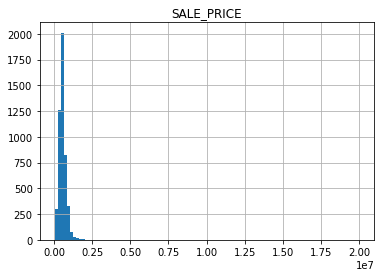

In [0]:
#start with the price
REStaten_.hist('SALE_PRICE',bins=100)

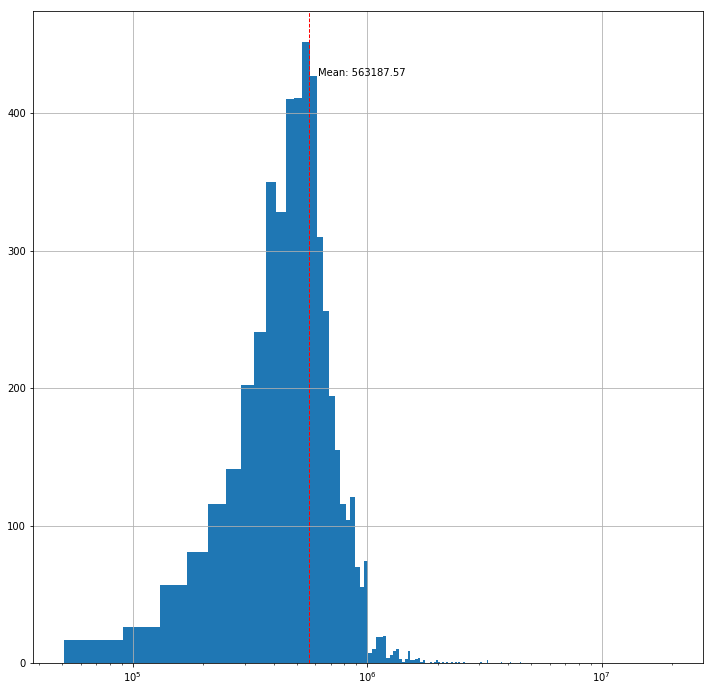

In [0]:
#as the distribution is highly skewed to the left, try log-histogram 
fig, ax = plt.subplots(figsize = (12,12))
ax.set_xscale('log')
REStaten_['SALE_PRICE'].hist(ax=ax,bins=500)
#add mean price
mu=REStaten_['SALE_PRICE'].mean()
plt.axvline(mu, color='r', linestyle='dashed', linewidth=1) 
min_ylim, max_ylim = plt.ylim()
plt.text(mu*1.1, max_ylim*0.9, 'Mean: {:.2f}'.format(mu));

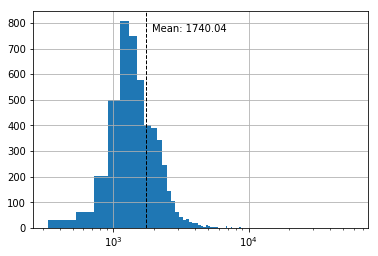

In [0]:
#distribution of house sizes, log-scale
fig, ax = plt.subplots()
ax.set_xscale('log')
REStaten_['GROSS_SQUARE_FEET'].hist(ax=ax,bins=300)
#add mean price
mu=REStaten_['GROSS_SQUARE_FEET'].mean()
plt.axvline(mu, color='k', linestyle='dashed', linewidth=1) 
min_ylim, max_ylim = plt.ylim()
plt.text(mu*1.1, max_ylim*0.9, 'Mean: {:.2f}'.format(mu));

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f492408a358>]],
      dtype=object)

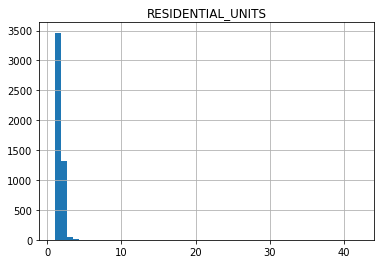

In [0]:
REStaten_.hist('RESIDENTIAL_UNITS',bins=50)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f492455b358>]],
      dtype=object)

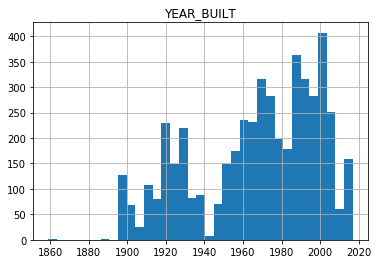

In [0]:
#year built distirbution - clearly there were two major period: pre- and post- World War II
REStaten_.hist('YEAR_BUILT',bins=35)

In [0]:
#now find the most expensive house
REStaten_.loc[REStaten_['SALE_PRICE'].idxmax()]

BOROUGH                                                                     5
NEIGHBORHOOD                                          NEW BRIGHTON-ST. GEORGE
BUILDING_CLASS_CATEGORY           08 RENTALS - ELEVATOR APARTMENTS           
TAX_CLASS_AT_PRESENT                                                        2
BLOCK                                                                      13
LOT                                                                        60
EASE-MENT                                                                    
BUILDING_CLASS_AT_PRESENT                                                  D6
ADDRESS                                                 224 RICHMOND TERRACE 
APARTMENT_NUMBER                                                             
ZIP_CODE                                                                10301
RESIDENTIAL_UNITS                                                          40
COMMERCIAL_UNITS                                                

In [0]:
#and the largest one - the same house apparently!
REStaten_.loc[REStaten_['GROSS_SQUARE_FEET'].idxmax()]

BOROUGH                                                                     5
NEIGHBORHOOD                                          NEW BRIGHTON-ST. GEORGE
BUILDING_CLASS_CATEGORY           08 RENTALS - ELEVATOR APARTMENTS           
TAX_CLASS_AT_PRESENT                                                        2
BLOCK                                                                      13
LOT                                                                        60
EASE-MENT                                                                    
BUILDING_CLASS_AT_PRESENT                                                  D6
ADDRESS                                                 224 RICHMOND TERRACE 
APARTMENT_NUMBER                                                             
ZIP_CODE                                                                10301
RESIDENTIAL_UNITS                                                          40
COMMERCIAL_UNITS                                                

Now look at the correlation between all the quantitative parameters of the properties

In [0]:
REStaten_[['YEAR_BUILT','RESIDENTIAL_UNITS','COMMERCIAL_UNITS','GROSS_SQUARE_FEET','LAND_SQUARE_FEET','SALE_PRICE']].corr()

,YEAR_BUILT,RESIDENTIAL_UNITS,COMMERCIAL_UNITS,GROSS_SQUARE_FEET,LAND_SQUARE_FEET,SALE_PRICE
YEAR_BUILT,1.000000,-0.044512,-0.082578,0.048370,-0.212966,0.105413
RESIDENTIAL_UNITS,-0.044512,1.000000,0.149435,0.771761,0.215693,0.558894
COMMERCIAL_UNITS,-0.082578,0.149435,1.000000,0.306401,0.064640,0.195430
GROSS_SQUARE_FEET,0.048370,0.771761,0.306401,1.000000,0.399676,0.782826
LAND_SQUARE_FEET,-0.212966,0.215693,0.064640,0.399676,1.000000,0.428592
SALE_PRICE,0.105413,0.558894,0.195430,0.782826,0.428592,1.000000


Size, land area and the number of residential units appear to demonstrate the strongest correlations

Perform a uni-variate linear regression on the feature showing the strongest correlation - the size

In [0]:
from sklearn.linear_model import LinearRegression

In [0]:
#fit the regression without intercept
lm = LinearRegression(fit_intercept=False).fit(REStaten_[['GROSS_SQUARE_FEET']], REStaten_['SALE_PRICE'])

In [0]:
#slope coefficient
lm.coef_

array([287.9862361])

In [0]:
#fit regression with intercept
lm = LinearRegression(fit_intercept=True).fit(REStaten_[['GROSS_SQUARE_FEET']], REStaten_['SALE_PRICE'])

In [0]:
print('Price~{}*Size+{}'.format(lm.coef_[0],lm.intercept_))

Price~225.81285045689492*Size+170263.92882602802


Now standardize the sale_price and gross_square_feet by subtracting averages and dividing by standard deviation
$$
X^*:=(X-E[X])/\sigma(X)
$$
Repeat the regression. Compare the regression coefficient against the correlation between sale_price and gross_square_feet. Do you find smth interesting here? Does the slope coefficient remind you something?

In [0]:
REStaten_['PRICE_stand']=(REStaten_['SALE_PRICE']-REStaten_['SALE_PRICE'].mean())/REStaten_['SALE_PRICE'].std()

In [0]:
REStaten_['SIZE_stand']=(REStaten_['GROSS_SQUARE_FEET']-REStaten_['GROSS_SQUARE_FEET'].mean())/REStaten_['GROSS_SQUARE_FEET'].std()

In [0]:
#alternative implementation with statistical summary

In [0]:
#alternative with fomulae (-1 stands for no intercept as it inclused one by default)
lm = smf.ols(formula='PRICE_stand~SIZE_stand-1', data = REStaten_).fit()
print(lm.summary())

                                 OLS Regression Results                                
Dep. Variable:            PRICE_stand   R-squared (uncentered):                   0.613
Model:                            OLS   Adj. R-squared (uncentered):              0.613
Method:                 Least Squares   F-statistic:                              7700.
Date:                Mon, 30 Sep 2019   Prob (F-statistic):                        0.00
Time:                        14:17:22   Log-Likelihood:                         -4595.5
No. Observations:                4866   AIC:                                      9193.
Df Residuals:                    4865   BIC:                                      9199.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [0]:
#now get back to the orignal non-standardised regression
lm = smf.ols(formula='SALE_PRICE~GROSS_SQUARE_FEET', data = REStaten_).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:             SALE_PRICE   R-squared:                       0.613
Model:                            OLS   Adj. R-squared:                  0.613
Method:                 Least Squares   F-statistic:                     7698.
Date:                Mon, 30 Sep 2019   Prob (F-statistic):               0.00
Time:                        14:17:22   Log-Likelihood:                -67117.
No. Observations:                4866   AIC:                         1.342e+05
Df Residuals:                    4864   BIC:                         1.343e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          1.703e+05   5618.03

In [0]:
#without intercept
lm = smf.ols(formula='SALE_PRICE~GROSS_SQUARE_FEET-1', data = REStaten_).fit()
print(lm.summary())

                                 OLS Regression Results                                
Dep. Variable:             SALE_PRICE   R-squared (uncentered):                   0.856
Model:                            OLS   Adj. R-squared (uncentered):              0.856
Method:                 Least Squares   F-statistic:                          2.889e+04
Date:                Mon, 30 Sep 2019   Prob (F-statistic):                        0.00
Time:                        14:17:22   Log-Likelihood:                         -67538.
No. Observations:                4866   AIC:                                  1.351e+05
Df Residuals:                    4865   BIC:                                  1.351e+05
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                        coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------

The summary does not only return the coefficient estimate but also a lot of statistics including standard error and confidence interval for it. Where do those come from as the formulae (2.3) seem perfectly robust. Illustrate uncertainty in the model estimates using the experiment below.

In [0]:
#perform regression on 100 subsamples
np.random.seed(2019)
W=[]
for i in range(0,100):
    df=REStaten_.sample(frac=0.99)
    lm = smf.ols(formula='SALE_PRICE~GROSS_SQUARE_FEET-1', data = df).fit()
    W+=[lm.params.GROSS_SQUARE_FEET]

In [0]:
#and report mean and standard deviations of the resulting slope coefficients
np.array(W).mean()

287.97094096712567

In [0]:
np.array(W).std()

1.6938576270438803

but mind the fact that variance will actually depend on the sample sizes and there is no direct correspondence - it was coincidental that the std of our experiments matched standard error reported in the regression summary. Those are different concepts. This experiment is just an illustration of the idea

Visualizations might give an idea on how regression performs 

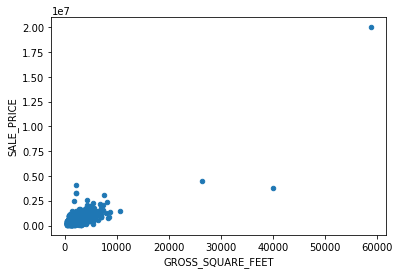

In [0]:
#first visualize the data
REStaten_.plot(x='GROSS_SQUARE_FEET',y='SALE_PRICE',kind='scatter')

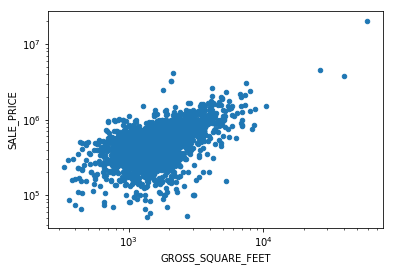

In [0]:
#as outliers dominate and the distributions are skewed consider log-scale
REStaten_.plot(x='GROSS_SQUARE_FEET',y='SALE_PRICE',kind='scatter', logx=True, logy=True)

In [0]:
#obtain values predicted by the regression
lm = smf.ols(formula='SALE_PRICE~GROSS_SQUARE_FEET-1', data = REStaten_).fit()
REStaten_['predicted_price']=lm.predict()

In [0]:
REStaten_[['SALE_PRICE','predicted_price']].head()

,SALE_PRICE,predicted_price
0,1185000,863958.708302
1,866000,642209.306505
2,530000,262643.447324
3,735000,509159.665426
4,475000,454730.266803


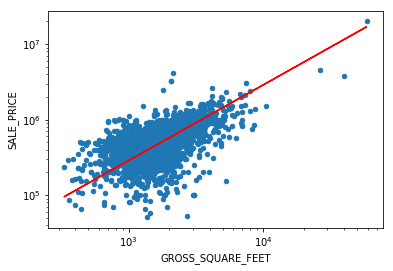

In [0]:
fig, ax = plt.subplots() #get axis to plot on
ax.set_xscale('log'); ax.set_yscale('log') #set up log-scale for axis
REStaten_.plot(ax=ax,kind='scatter',x='GROSS_SQUARE_FEET',y='SALE_PRICE') #show the data
ax.plot(REStaten_.GROSS_SQUARE_FEET,REStaten_.predicted_price,'r-'); #show the regression line

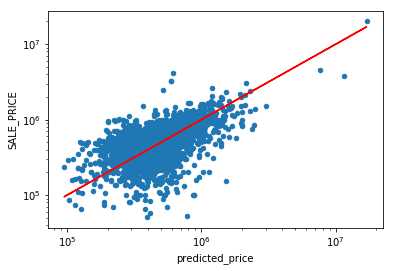

In [0]:
#another way - visualize actual values vs predicted (works also for multi-variate regressions)
fig, ax = plt.subplots() #get axis to plot on
ax.set_xscale('log'); ax.set_yscale('log') #set up log-scale for axis
REStaten_.plot(ax=ax,kind='scatter',x='predicted_price',y='SALE_PRICE') #show the data
ax.plot(REStaten_.predicted_price,REStaten_.predicted_price,'r-'); #show the regression line

## Multi-variate regression case

Now try multivariate regression on GROSS_SQUARE_FEET+LAND_SQUARE_FEET+YEAR_BUILT together

In [0]:
lm = smf.ols(formula='SALE_PRICE~GROSS_SQUARE_FEET+LAND_SQUARE_FEET+YEAR_BUILT', data = REStaten_).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:             SALE_PRICE   R-squared:                       0.639
Model:                            OLS   Adj. R-squared:                  0.639
Method:                 Least Squares   F-statistic:                     2873.
Date:                Mon, 30 Sep 2019   Prob (F-statistic):               0.00
Time:                        14:17:29   Log-Likelihood:                -66944.
No. Observations:                4866   AIC:                         1.339e+05
Df Residuals:                    4862   BIC:                         1.339e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -2.378e+06    2.1e+0

In [0]:
#notice that the coefficient for the gross_square_feet have changed again - likely due to the correlation with land size

Now try multivariate regression on RESIDENTIAL_UNITS+COMMERCIAL_UNITS together

In [0]:
lm = smf.ols(formula='SALE_PRICE~RESIDENTIAL_UNITS+COMMERCIAL_UNITS', data = REStaten_).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:             SALE_PRICE   R-squared:                       0.325
Model:                            OLS   Adj. R-squared:                  0.325
Method:                 Least Squares   F-statistic:                     1172.
Date:                Mon, 30 Sep 2019   Prob (F-statistic):               0.00
Time:                        14:17:31   Log-Likelihood:                -68468.
No. Observations:                4866   AIC:                         1.369e+05
Df Residuals:                    4863   BIC:                         1.370e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          3.142e+05   6971.52

And now combine all the variables together

In [0]:
lm = smf.ols(formula='SALE_PRICE~GROSS_SQUARE_FEET+LAND_SQUARE_FEET+YEAR_BUILT+RESIDENTIAL_UNITS+COMMERCIAL_UNITS', data = REStaten_).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:             SALE_PRICE   R-squared:                       0.642
Model:                            OLS   Adj. R-squared:                  0.641
Method:                 Least Squares   F-statistic:                     1740.
Date:                Mon, 30 Sep 2019   Prob (F-statistic):               0.00
Time:                        14:17:32   Log-Likelihood:                -66929.
No. Observations:                4866   AIC:                         1.339e+05
Df Residuals:                    4860   BIC:                         1.339e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -2.099e+06   2.16e+0

Again, the coefficients have changed, but now, surprisingly, now the impact of residential and commercial units seem to be negative!

This is because they are strongly correlated with house size and for the houses of the same size, slicing them into the larger number of smaller units does not seem to increase the price anymore. However we should be careful with interpretations when the regressors are correlated 

In [0]:
REStaten["SALE_PRICE"].max()

## Homework task 1
Analize the single familty houses (RESIDENTIAL_UNITS==1, COMMERCIAL_UNITS==0) separately

Q1. Find the single-family house with the highest price per square foot

Q2. Build correlation matrix for YEAR_BUILT,GROSS_SQUARE_FEET, LAND_SQUARE_FEET

Q3. Perform the SALE_PRICE~GROSS_SQUARE_FEET+LAND_SQUARE_FEET+YEAR_BUILT regression using any of the methods above. Visualize the fit

Q4. Apply regression trained for single family houses from Q3 to predict prices for a different dataframe of duplexes (two residential units). Visualize the fit and compute the R2 over duplexes. We can compare it with the R2 of the regression trained for duplexes in task 2

In [0]:
REStaten_["RESIDENTIAL_UNITS"].value_counts()

1     3464
2     1324
3       42
4       20
6        4
8        4
5        3
7        1
42       1
18       1
40       1
36       1
Name: RESIDENTIAL_UNITS, dtype: int64

In [0]:
temp = REStaten_.loc[(REStaten_['RESIDENTIAL_UNITS']==1) & (REStaten_['COMMERCIAL_UNITS']==0)].copy()
temp.loc[(temp['SALE_PRICE'] / temp['GROSS_SQUARE_FEET']).idxmax()]

BOROUGH                                                                     5
NEIGHBORHOOD                                                    OAKWOOD-BEACH
BUILDING_CLASS_CATEGORY           01 ONE FAMILY DWELLINGS                    
TAX_CLASS_AT_PRESENT                                                        1
BLOCK                                                                    4678
LOT                                                                         1
EASE-MENT                                                                    
BUILDING_CLASS_AT_PRESENT                                                  A1
ADDRESS                                                     402 GUYON AVENUE 
APARTMENT_NUMBER                                                             
ZIP_CODE                                                                10306
RESIDENTIAL_UNITS                                                           1
COMMERCIAL_UNITS                                                

In [0]:
cols = ["YEAR_BUILT","GROSS_SQUARE_FEET","LAND_SQUARE_FEET"]
temp[cols].corr()

,YEAR_BUILT,GROSS_SQUARE_FEET,LAND_SQUARE_FEET
YEAR_BUILT,1.000000,0.143736,-0.260088
GROSS_SQUARE_FEET,0.143736,1.000000,0.515321
LAND_SQUARE_FEET,-0.260088,0.515321,1.000000


In [0]:
lr = smf.ols(formula='SALE_PRICE~GROSS_SQUARE_FEET+LAND_SQUARE_FEET+YEAR_BUILT', data = temp).fit()
temp["GLY-S Prediction"]= lr.predict()
temp["GLY-S Prediction"].head(8)


0    889604.821199
1    746900.467101
2    454567.005296
3    643404.338376
4    486649.989267
5    477149.284997
6    649218.480360
7    530443.886348
Name: GLY-S Prediction, dtype: float64

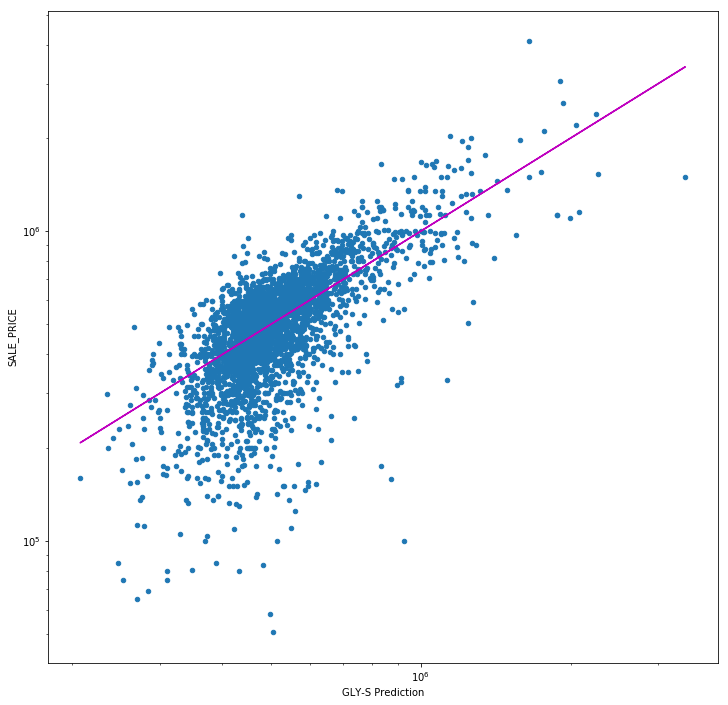

In [0]:
fig, ax = plt.subplots(figsize = (12,12)) 
ax.set_xscale('log'); ax.set_yscale('log')
temp.plot(ax=ax,kind='scatter',x='GLY-S Prediction',y='SALE_PRICE')
ax.plot(temp["GLY-S Prediction"],temp["GLY-S Prediction"],'m-'); #show the regression line

In [0]:
from sklearn.metrics import r2_score
temp03 = REStaten_.loc[REStaten_['RESIDENTIAL_UNITS']==2].copy()
temp03.head()
#len(temp03)
ls1 = smf.ols(formula='SALE_PRICE~GROSS_SQUARE_FEET+LAND_SQUARE_FEET+YEAR_BUILT', data = temp03).fit()
temp03["GLY-S Prediction"]= ls1.predict()
print('R2 Score: ',r2_score(temp03['SALE_PRICE'],temp03['GLY-S Prediction']))

R2 Score:  0.3121285571725253


## Homework task 2

Now consider houses with different numbers of residential units: repeat the SALE_PRICE~GROSS_SQUARE_FEET+LAND_SQUARE_FEET+YEAR_BUILT regression for houses with  RESIDENTIAL_UNITS==1,2 and "3 or above", COMMERCIAL_UNITS==0. Summarize the number of samples in each category, coefficients and r-squared values of the corresponding regressions in a dataframe with the following columns: samples,GROSS_SQUARE_FEET_coef,LAND_SQUARE_FEET_coef,YEAR_BUILT,coef,Intercept,R2. Make the number of RESIDENTIAL_UNITS (1,2 or '3+') an index

In [58]:
condition = (REStaten_.RESIDENTIAL_UNITS==2)&(REStaten_.COMMERCIAL_UNITS==0)
df = REStaten_.loc[condition].copy()

formula = 'SALE_PRICE~GROSS_SQUARE_FEET+LAND_SQUARE_FEET+YEAR_BUILT'
linear_regression = smf.ols(formula=formula, data = df).fit()

condition2 = (REStaten_.RESIDENTIAL_UNITS>=3)&(REStaten_.COMMERCIAL_UNITS==0)
df2 = REStaten_.loc[condition2].copy()

linear_regression2 = smf.ols(formula=formula, data = df2).fit()


data_dictionary1 = {'Parameter' : ['Samples' , 'LSF', 'YB', ' Int', 'R2', 'GSF'], 'Units : 1' : [temp.shape[0],lr.params[2],lr.params[3],lr.params[0], lr.rsquared, lr.params[1]]  ,'Units :  2': [temp03.shape[0],linear_regression.params[2], linear_regression.params[3], linear_regression.params[0], linear_regression.rsquared,linear_regression.params[1]] , 'Units >=3':[df.shape[0], linear_regression2.params[2],linear_regression2.params[3], linear_regression2.params[0], linear_regression2.rsquared, linear_regression2.params[1]]}
df1 = pd.DataFrame.from_dict(data_dictionary1)
df1

,Parameter,Units : 1,Units : 2,Units >=3
0,Samples,3.440000e+03,1.324000e+03,1.299000e+03
1,LSF,2.986947e+01,3.190193e+01,2.660805e+01
2,YB,1.030027e+03,2.387006e+03,3.168789e+03
3,Int,-1.837565e+06,-4.389802e+06,-5.813505e+06
4,R2,5.586154e-01,3.149071e-01,8.410107e-01
5,GSF,1.471831e+02,9.140410e+01,8.384738e+01


## Urban activity data

Recall urban population and activity data case from a previous class notebook

In [0]:
SMdata=SMdata.merge(LEHDR[['total']].rename(columns={'total':'residential'}), on=None, left_index=True, right_index=True, how='inner')

In [0]:
#glimpse into the final data
SMdata.head()

,population,mobile,citibike,sr311,subway,taxi,twitter,working,residential
tz,,,,,,,,,
3,32450.0,109300,0,700,225527.5,31960,480,4989,11398
4,27571.0,179644,31545,399,0.0,178515,85,2717,12318
5,26482.0,56271,0,490,0.0,3667,40,1191,10751
6,15896.0,147674,0,255,0.0,7456,88,2495,6729
7,77252.0,508255,0,1389,3336898.0,362180,2294,17223,43048


In [0]:
#get pair-wise column correlations
SMdata.corr()

,population,mobile,citibike,sr311,subway,taxi,twitter,working,residential
population,1.000000,0.670248,-0.210465,0.877397,-0.042691,-0.059860,-0.028276,-0.099852,0.969425
mobile,0.670248,1.000000,-0.066319,0.607098,0.219016,0.144768,0.214191,0.175743,0.646672
citibike,-0.210465,-0.066319,1.000000,-0.183276,0.486907,0.748109,0.372861,0.513090,-0.102762
sr311,0.877397,0.607098,-0.183276,1.000000,-0.010677,-0.026607,0.066799,-0.049597,0.865145
subway,-0.042691,0.219016,0.486907,-0.010677,1.000000,0.630203,0.496341,0.703456,0.020381
taxi,-0.059860,0.144768,0.748109,-0.026607,0.630203,1.000000,0.556061,0.720043,0.053496
twitter,-0.028276,0.214191,0.372861,0.066799,0.496341,0.556061,1.000000,0.626458,0.017787
working,-0.099852,0.175743,0.513090,-0.049597,0.703456,0.720043,0.626458,1.000000,-0.040786
residential,0.969425,0.646672,-0.102762,0.865145,0.020381,0.053496,0.017787,-0.040786,1.000000


But notice that some activities are not defined for the entire city. Would be more appropriate to correlate only where activity is defined

In [0]:
#auxiliary function to compute correlations between columns where both have data
def NZPopCorr(col1,col2):
    ind=(SMdata[col1]>0)&(SMdata[col2]>0)
    return np.corrcoef(SMdata[col1][ind],SMdata[col2][ind])[0][1]

In [0]:
#output a table with correlations between activities and population counts
PL=['population','residential','working']
ML=['taxi','subway','citibike','twitter','mobile','sr311']
pd.DataFrame([[NZPopCorr(M,P) for P in PL] for M in ML],columns=PL,index=ML) 

,population,residential,working
taxi,-0.064720,0.049633,0.719559
subway,-0.232504,-0.141712,0.720643
citibike,-0.126996,0.011210,0.319030
twitter,-0.032551,0.017787,0.626458
mobile,0.676604,0.646672,0.175743
sr311,0.869460,0.863358,-0.056116


Now we can implement a regression for urban activities a) vs population and b) vs LEHD residential and working population taken as separate regressors

In [0]:
tdata=gpd.read_file('/content/drive/My Drive/Untitled folder/taxi_zones.shp')

### Homework task 3: 
Q1. Implement all regressions of each activity vs residential and working population, no intercept in a cycle.
Create two bar plots of a) R2's b) coefficients 

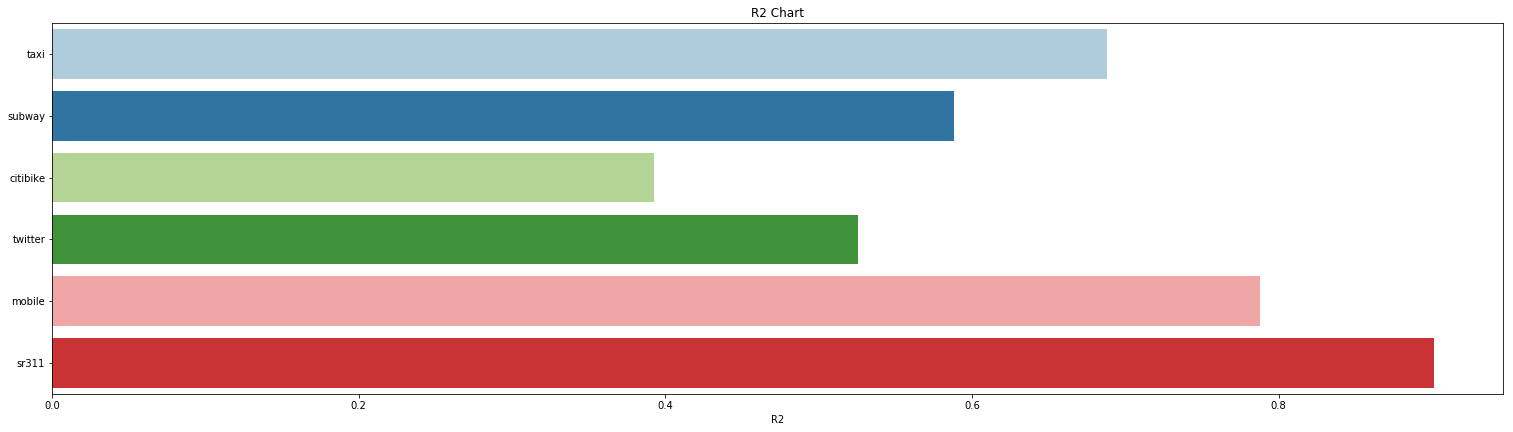

In [0]:

data = []

for x in ['taxi','subway','citibike','twitter','mobile','sr311']:
  lm = smf.ols(formula= x+'~residential+working-1', data = SMdata).fit()
  coef = lm.params.tolist()
  r2 = lm.rsquared
  coef.append(r2)
  data.append(coef)


dataframe_temp = pd.DataFrame(data=data, index=['taxi','subway','citibike','twitter','mobile','sr311'], columns=['Residential','Working','R2'])


fig = plt.figure(figsize=(26,15))
ax1 = fig.add_subplot(2,1,1)
ax1.set_title('R2 Chart')
sns.barplot(y=dataframe_temp.index, x=dataframe_temp['R2'], ax=ax1, palette = "Paired", orient="h")


/usr/local/lib/python3.6/dist-packages/pandas/plotting/_core.py:1801: UserWarning:

To output multiple subplots, the figure containing the passed axes is being cleared



array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f671474e518>,
      dtype=object)

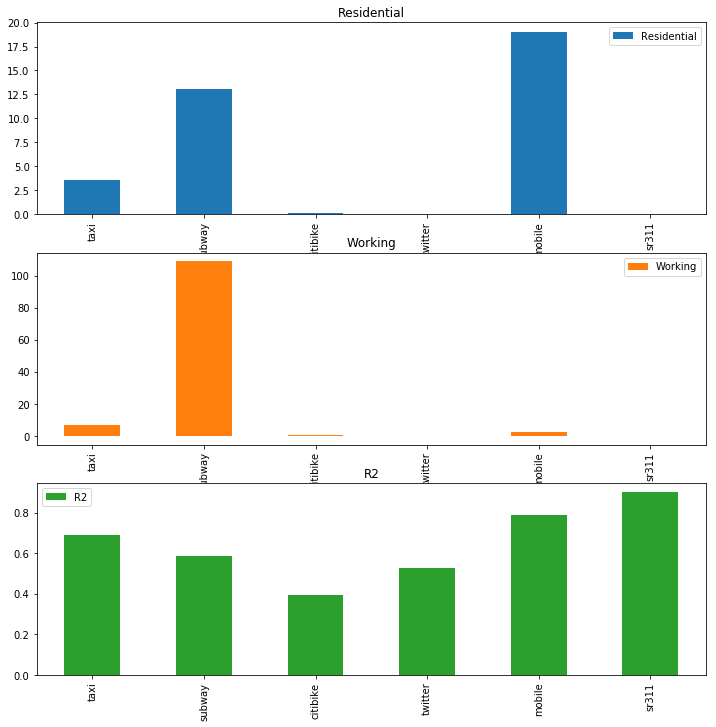

In [0]:

fig = plt.figure(figsize=(12,12))
ax2 = fig.add_subplot(2,1,2)
ax2.set_title('Coef Chart(LOG SCALE)')
ax2.set(yscale="log")
dataframe_temp.plot.bar(ax=ax2, legend = True, subplots = True)


Q2. Create a heatmap of the **log-ratios** between actual taxi ridership vs regression prediction to see where ridership is over/underestimated. Use taxi zones shapefile included in the data

In [0]:

lm1 = smf.ols(formula= 'taxi~residential+working', data = SMdata).fit()


SMdata['taxi prediction']  = lm1.predict()

tdata['taxi'] = tdata.LocationID.map({tz:SMdata['taxi'][tz] for tz in SMdata.index})
tdata['taxi prediction'] = tdata.LocationID.map({tz:SMdata['taxi prediction'][tz] for tz in SMdata.index})

tdata.dropna(inplace=True)


tdata['LRT'] = np.log1p(tdata['taxi'] / tdata['taxi prediction'])
tdata.head()


,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry,taxi prediction_x,taxi prediction_y,taxi_x,taxi prediction,taxi_y,LRT,taxi
3,4,0.043567,0.000112,Alphabet City,4,Manhattan,"POLYGON ((992073.467 203714.076, 992068.667 20...",61715.911159,61715.911159,178515,78210.142610,178515,1.188607,178515
4,5,0.092146,0.000498,Arden Heights,5,Staten Island,"POLYGON ((935843.310 144283.336, 936046.565 14...",46023.718234,46023.718234,3667,65423.057056,3667,0.054536,3667
5,6,0.150491,0.000606,Arrochar/Fort Wadsworth,6,Staten Island,"POLYGON ((966568.747 158679.855, 966615.256 15...",40428.367697,40428.367697,7456,65843.300526,7456,0.107273,7456
6,7,0.107417,0.000390,Astoria,7,Queens,"POLYGON ((1010804.218 218919.641, 1011049.165 ...",267016.142455,267016.142455,362180,230794.969536,362180,0.943622,362180
7,8,0.027591,0.000027,Astoria Park,8,Queens,"POLYGON ((1005482.276 221686.466, 1005304.898 ...",611.907417,611.907417,2900,37137.977350,2900,0.075188,2900


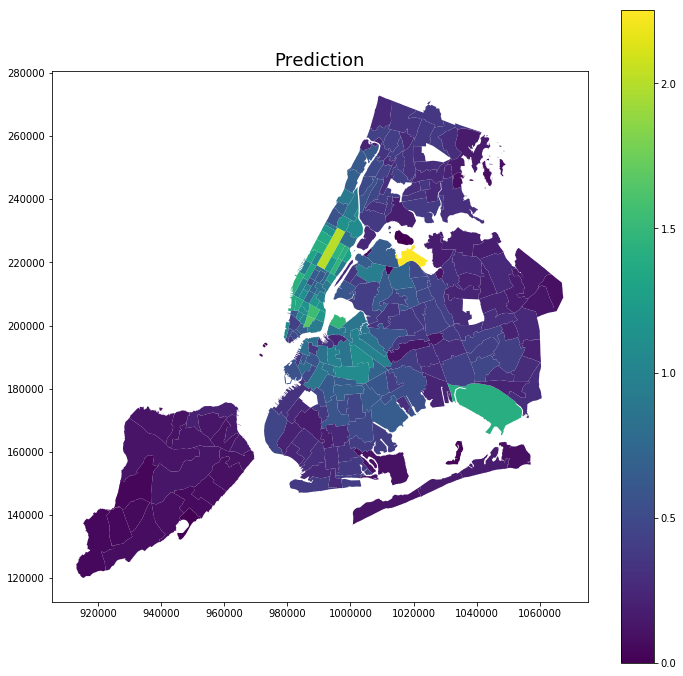

In [0]:
f, ax = plt.subplots(figsize=(12, 12))
ax.set_title("Prediction", fontsize=18)
tdata.plot(ax=ax, column='LRT',legend = True)